# TP1 - KNN

In [1]:
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata("/Users/admin/scikit_learn_data/mldata/mnist") 

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('mnist-original')


In [2]:
print(mnist)

{'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.]), 'COL_NAMES': ['label', 'data'], 'DESCR': 'mldata.org dataset: mnist-original'}


### Matrice de 70000 lignes et 784 colonnes.

In [3]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
print (mnist.target)

[ 0.  0.  0. ...,  9.  9.  9.]


In [5]:
len(mnist.data)
len(mnist.target)

70000

In [6]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [7]:
print (mnist.data.shape)

(70000, 784)


In [8]:
print (mnist.target.shape)

(70000,)


In [9]:
mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [10]:
mnist.data[0][300]

253

In [11]:
mnist.data[:,1]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [12]:
mnist.data[:100]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Images

In [13]:
#from sklearn import datasets
#import matplotlib.pyplot as plt
#mnist = datasets.fetch_mldata('MNIST original')

import matplotlib.pyplot as plt

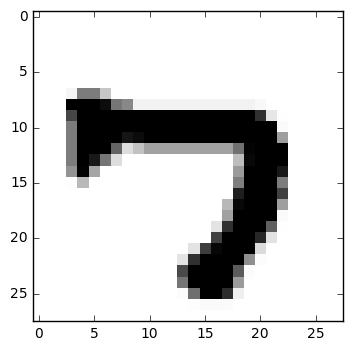

In [14]:
images = mnist.data.reshape((-1, 28, 28))
plt.imshow(images[45678],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show() 

In [15]:
mnist.target[45678]

7.0

# KNN

In [48]:
from sklearn import neighbors
from sklearn import model_selection
import numpy as np

data = np.random.randint(70000, size=5000)

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=0.8)

/Users/admin/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [49]:
print(xtrain.shape)
print(ytrain.shape)

(4000, 784)
(4000,)


In [50]:
xtrain[0].shape

(784,)

In [51]:
mnist.data[666].shape

(784,)

In [52]:
print(xtest.shape)
print(ytest.shape)

(1000, 784)
(1000,)


In [53]:
clf = neighbors.KNeighborsClassifier(10)

clf.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [54]:
mnist.target[45678]
clf.predict(mnist.data[45678].reshape((1, -1)))

array([ 7.])

In [55]:
clf.score(xtest, ytest)

0.90400000000000003

Taux d'erreur : 1 - 0.904 = 0.096

In [56]:
for i in range (2,15) :
    clf = neighbors.KNeighborsClassifier(i)
    clf.fit(xtrain, ytrain)
    print(i, "--> ", clf.score(xtest, ytest))
    

2 -->  0.908
3 -->  0.927
4 -->  0.924
5 -->  0.925
6 -->  0.913
7 -->  0.912
8 -->  0.909
9 -->  0.909
10 -->  0.904
11 -->  0.908
12 -->  0.905
13 -->  0.901
14 -->  0.902


La valeur qui semble sortir du lot est k = 3 ou 4.

/Users/admin/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


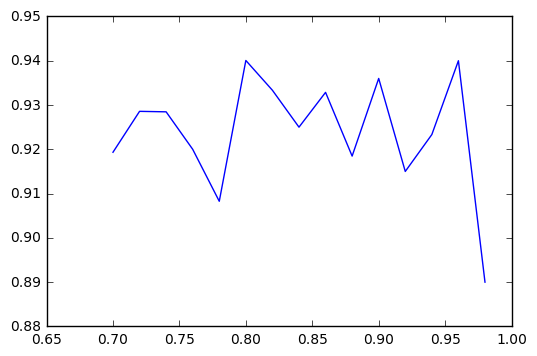

In [57]:
from pylab import *

scores = []
pourcentages = []
for i in range (0,15) :
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data[data], mnist.target[data], train_size=0.7 + i*0.02)
    clf = neighbors.KNeighborsClassifier(4)
    clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    scores.append(score)
    pourcentages.append(0.7 + i*0.02)
    
plot(pourcentages,scores)
show()